In [25]:
import os 
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np

In [50]:
import pandas as pd

#import the data 
# os.chdir("./data")

def read_data(file_name):
    labels = []
    titles = []
    with open(file_name, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if 'BillID' not in line:
                split = line.split("\t")
                label = int(split[-1].rstrip("\n"))
                labels.append(label)
                title = split[-2].replace('"', "").replace(",", "").replace(".", "").lower()
                titles.append(title)
                
    return (titles, labels)

train_titles_raw, train_labels_raw = read_data("congress_train.txt")
val_titles_raw, val_labels_raw = read_data("congress_val.txt")
test_titles_raw, test_labels_raw = read_data("congress_test.txt")

In [51]:
#check the data length 

print (len(train_titles_raw), len(train_labels_raw))
print (len(val_titles_raw), len(val_labels_raw))
print (len(test_titles_raw), len(test_labels_raw))

278612 278612
69649 69649
38693 38693


In [52]:
#setting up_data
def setting_data(text_lst,maxlen, max_words):
    maxlen = maxlen
    max_words = max_words

    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(text_lst)
    sequences = tokenizer.texts_to_sequences(text_lst)

    word_index = tokenizer.word_index
    print('Found %s unique tokens.' % len(word_index))

    data = pad_sequences(sequences, maxlen=maxlen)

    print('Shape of data tensor:', data.shape)
    return (data)

In [53]:
#preprocessing train data 
x_train = setting_data(train_titles_raw, 
                       maxlen = 100,
                       max_words = 10000)

y_train = to_categorical(train_labels_raw)

#preprocessing validation data 
x_val = setting_data(val_titles_raw, 
                     maxlen = 100, 
                     max_words = 10000)

y_val = to_categorical(val_labels_raw)

#preprocessing test data 
x_test = setting_data(test_titles_raw, 
                      maxlen = 100,
                      max_words = 10000)

y_test = to_categorical(test_labels_raw)

Found 44329 unique tokens.
Shape of data tensor: (278612, 100)
Found 25840 unique tokens.
Shape of data tensor: (69649, 100)
Found 20362 unique tokens.
Shape of data tensor: (38693, 100)


In [56]:
x_val

array([[  0,   0,   0, ...,   5,  11,  13],
       [  0,   0,   0, ...,   5,  26, 186],
       [  0,   0,   0, ...,   5, 168,  13],
       ...,
       [  0,   0,   0, ...,   5,  11,  13],
       [  0,   0,   0, ...,  14,  23, 158],
       [  0,   0,   0, ...,   5,  11,  13]])

### Estimate a basic feed-forward network

In [57]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

basic_model = Sequential()

# output dim = 32
basic_model.add(Embedding(10000, 32, input_length = 100))
basic_model.add(Flatten())
basic_model.add(Dense(24, activation='softmax'))

basic_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
basic_model.summary()

history = basic_model.fit(x_train, y_train, 
                          epochs= 10, 
                          batch_size= 1024,
                         validation_data = (x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                76824     
Total params: 396,824
Trainable params: 396,824
Non-trainable params: 0
_________________________________________________________________
Train on 278612 samples, validate on 69649 samples
Epoch 1/10
278612/278612 [==============================] - 20s 71us/step - loss: 2.1255 - acc: 0.4137 - val_loss: 2.6988 - val_acc: 0.1944
Epoch 2/10
278612/278612 [==============================] - 20s 71us/step - loss: 1.0025 - acc: 0.7449 - val_loss: 3.0519 - val_acc: 0.1542
Epoch 3/10
278612/278612 [==============================] - 20s 70us/

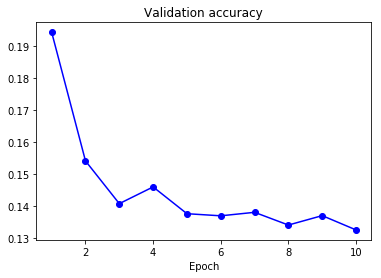

<Figure size 432x288 with 0 Axes>

In [58]:
basic_val_acc = history.history['val_acc']
basic_val_loss = history.history['val_loss']

epochs = range(1, len(basic_val_acc) + 1)

plt.plot(epochs, basic_val_acc, 'b', marker='o', label='Validation acc')
plt.title('Validation accuracy')
plt.xlabel("Epoch")
plt.figure()
plt.show()

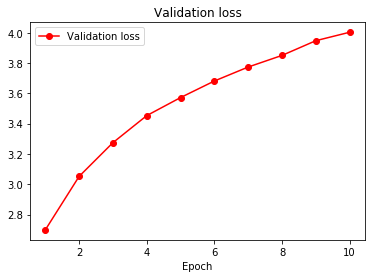

In [59]:
plt.clf()
plt.plot(epochs, basic_val_loss, 'r',marker = "o", label='Validation loss')
plt.title('Validation loss')
plt.xlabel("Epoch")
plt.legend()
plt.show()

### Estimate a recurrent neural network (RNN) with a layer_simple_rnn

In [ ]:
from keras.layers import SimpleRNN

simple_rnn = Sequential()
simple_rnn.add(Embedding(10000, 32, input_length = 100))
simple_rnn.add(SimpleRNN(32))
simple_rnn.add(Dense(24, activation='softmax'))

simple_rnn.compile(optimizer='rmsprop', 
                   loss='categorical_crossentropy', 
                   metrics=['acc'])
simple_rnn.summary()

rnn_history = simple_rnn.fit(x_train, y_train, epochs= 10, batch_size= 1024,
                         validation_data = (x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 24)                792       
Total params: 322,872
Trainable params: 322,872
Non-trainable params: 0
_________________________________________________________________
Train on 278612 samples, validate on 69649 samples
Epoch 1/10
278612/278612 [==============================] - 69s 249us/step - loss: 2.3529 - acc: 0.3098 - val_loss: 3.3397 - val_acc: 0.1321
Epoch 2/10
278612/278612 [==============================] - 63s 226us/step - loss: 1.4941 - acc: 0.5871 - val_loss: 3.9578 - val_acc: 0.1077
Epoch 3/10
278612/278612 [==============================] - 65s 234

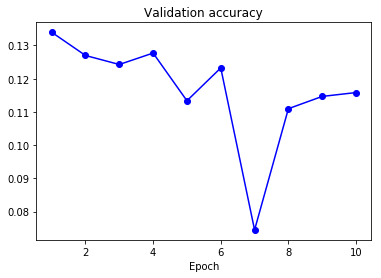

<Figure size 432x288 with 0 Axes>

In [11]:
rnn_val_acc = rnn_history.history['val_acc']
rnn_val_loss = rnn_history.history['val_loss']

epochs = range(1, len(rnn_val_acc) + 1)

plt.plot(epochs, rnn_val_acc, 'b', marker='o', label='Validation acc')
plt.title('Validation accuracy')
plt.xlabel("Epoch")
plt.figure()
plt.show()

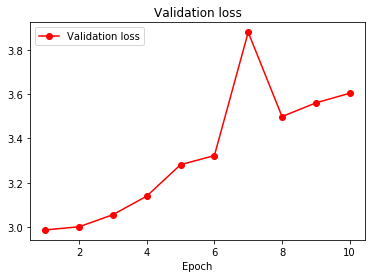

In [12]:
plt.clf()
plt.plot(epochs, rnn_val_loss, 'r',marker = "o", label='Validation loss')
plt.title('Validation loss')
plt.xlabel("Epoch")
plt.legend()
plt.show()

### Estimate an RNN with an LSTM layer

In [13]:
from keras.layers import LSTM

rnn_lstm = Sequential()
rnn_lstm.add(Embedding(10000, 32, input_length = 100))
rnn_lstm.add(LSTM(32))
rnn_lstm.add(Dense(24, activation='softmax'))

rnn_lstm.compile(optimizer='rmsprop', 
                   loss='categorical_crossentropy', 
                   metrics=['acc'])
rnn_lstm.summary()

lstm_history = rnn_lstm.fit(x_train, y_train, epochs= 10, batch_size= 1024,
                         validation_data = (x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 8)            80000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                216       
Total params: 80,760
Trainable params: 80,760
Non-trainable params: 0
_________________________________________________________________
Train on 274482 samples, validate on 69649 samples
Epoch 1/10
274482/274482 [==============================] - 28s 100us/step - loss: 2.9621 - acc: 0.0933 - val_loss: 2.9551 - val_acc: 0.1319
Epoch 2/10
274482/274482 [==============================] - 27s 97us/step - loss: 2.7003 - acc: 0.1533 - val_loss: 2.9414 - val_acc: 0.1318
Epoch 3/10
274482/274482 [==============================] - 27s 97us/s

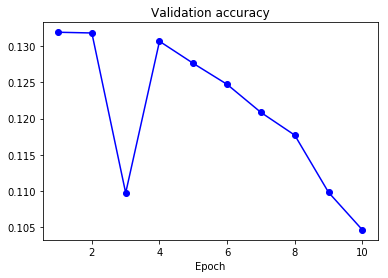

<Figure size 432x288 with 0 Axes>

In [14]:
lstm_val_acc = lstm_history.history['val_acc']
lstm_val_loss = lstm_history.history['val_loss']

epochs = range(1, len(lstm_val_acc) + 1)

plt.plot(epochs, lstm_val_acc, 'b', marker='o', label='Validation acc')
plt.title('Validation accuracy')
plt.xlabel("Epoch")
plt.figure()
plt.show()

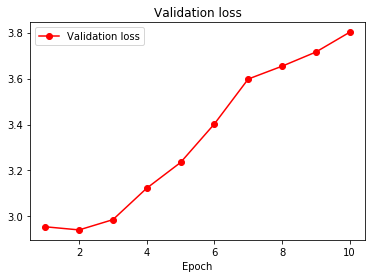

In [15]:
plt.clf()
plt.plot(epochs, lstm_val_loss, 'r',marker = "o", label='Validation loss')
plt.title('Validation loss')
plt.xlabel("Epoch")
plt.legend()
plt.show()

### Estimate an RNN with a GRU layer

In [ ]:
from keras.layers import GRU

gru = Sequential()
gru.add(Embedding(10000, 32, input_length = 100))
gru.add(GRU(32))
gru.add(Dense(24, activation='softmax'))

gru.compile(optimizer='rmsprop', 
                   loss='categorical_crossentropy', 
                   metrics=['acc'])
gru.summary()

gru_history = gru.fit(x_train, y_train, epochs= 10, batch_size= 1024,
                         validation_data = (x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 8)            80000     
_________________________________________________________________
gru_1 (GRU)                  (None, 8)                 408       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                216       
Total params: 80,624
Trainable params: 80,624
Non-trainable params: 0
_________________________________________________________________
Train on 274482 samples, validate on 69649 samples
Epoch 1/10
274482/274482 [==============================] - 23s 85us/step - loss: 2.9987 - acc: 0.0991 - val_loss: 2.8981 - val_acc: 0.1323
Epoch 2/10
274482/274482 [==============================] - 22s 82us/step - loss: 2.7175 - acc: 0.1599 - val_loss: 2.9497 - val_acc: 0.1247
Epoch 3/10
274482/274482 [==============================] - 22s 82us/st

In [ ]:
gru_val_acc = gru_history.history['val_acc']
gru_val_loss = gru_history.history['val_loss']

epochs = range(1, len(gru_val_acc) + 1)

plt.plot(epochs, gru_val_acc, 'b', marker='o', label='Validation acc')
plt.title('Validation accuracy')
plt.xlabel("Epoch")
plt.figure()
plt.show()

In [ ]:
plt.clf()
plt.plot(epochs, gru_val_loss, 'r',marker = "o", label='Validation loss')
plt.title('Validation loss')
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
# import pickle

# history_lst = [history, rnn_history, lstm_history, gru_history]
# pickle.dump(history_lst, open("history_lst_1.p", "wb"))